# Problem set 3

Andrew Martin

Loan Repayment and State Aid

03/01/24

## 1. Develop hypotheses about two non-linear relationships [1 pt]

You can use the GSS data, Student aid data, or your own data. Develop at least 2 hypotheses about non-linear relationships in your dataset of choice that do the following:

    A. Use the form: The DV will change positive/negatively if the IV changes positively/negatively/categorically (specify what the variables measure and what the categories are if you have a categorical hypothesis)
    
    - The percent of loan repaid by an individual is positively impacted if the amount of aid provided by a state is positively increased.

    B. State if you expect each hypothesized relationship will be linear or take one of the 5 non-linear forms (1. nominal, 2. sequential dummies, 3. splines, 4. quadratic, 5. logarithmic). You tell us at least two different non-linear forms that you think your hypothesized relationships will or will not take.
    
    - I believe the relationship will take the form of both a linear spline and a piecewise cubic spline.

    C. State your explanation why (theory) you make the predictions in A. and B.
    
    - Because the more aid a state provides the smaller a loan a person needs to take, resulting in fewer payments over time, and thus an easier time to pay back a greater percentage of the loan.

    D. Tell us the source of your data and describe its sample.
    
    - Data Source: Dr. Eatons loanrepay data for 2013 that collects college financial aid for students with higher education institutions research level for different colleges and universities in the US.

## 2. Conduct statistical tests for your hypothesized relationship: [3 pts]

* Estimate at least 2 different types of non-linear models that test your hypotheses.

* Use appropriate regression and graphical representations to represent each model.

* Use esttab to compare between types of non-linear and linear models

In [3]:
%set graph_format svg

set error:
    parsing errors:
	[line  2]: 'graph_format svg'


In [4]:
qui log using w7lesson_log20200304.log, replace

NOTE: Load Data Set

In [5]:
set more off

(-set more- irrelevant in this version of Stata)


In [6]:
insheet using loanrepay2013_highestresearch.csv, clear

(19 vars, 33 obs)


In [7]:
ds

opeid         instnm        all_under     sgrnt_low_~c  xstring
acceptrate    stabbr        netprice4l~e  igrnt_low_~c  ystring
y_lo_inc_rpy  hgroup        spend_ugd_~w  sandigrnt_~c  markerlabel
lo_inc_deb~n  upgrntn       x_aid_byst~r  instatetui~n


NOTE: Variables of Interest
1. Dependent Variable = Loan Repayment [igrnt_low_~c]

2. Independent Variable = Aid by state [x_aid_byst~r]

QUESTION: Why is there no [control variable] for this assignment?

In [8]:
codebook igrnt_low_~c x_aid_byst~r


-------------------------------------------------------------------------------
igrnt_low_inc                                                       (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [3598.4646,32927.473]         Units: .0001
         Unique values: 33                        Missing .: 0/33

                  Mean: 15096.3
             Std. dev.: 7267.91

           Percentiles:     10%       25%       50%       75%       90%
                        8082.98   10928.7   12994.1   19387.6   25252.8

-------------------------------------------------------------------------------
x_aid_bysticker                                                 X_aid_bysticker
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [.0455,59.5033]               Units: .0001
         Unique values: 

In [9]:
label variable igrnt_low_~c "% Loan Repayment"
label variable x_aid_byst~r "aid by state"
codebook igrnt_low_~c x_aid_byst~r


-------------------------------------------------------------------------------
igrnt_low_inc                                                  % Loan Repayment
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [3598.4646,32927.473]         Units: .0001
         Unique values: 33                        Missing .: 0/33

                  Mean: 15096.3
             Std. dev.: 7267.91

           Percentiles:     10%       25%       50%       75%       90%
                        8082.98   10928.7   12994.1   19387.6   25252.8

-------------------------------------------------------------------------------
x_aid_bysticker                                                    aid by state
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [.0455,59.5033]               Units: .0001
         Unique values: 

In [10]:
sum igrnt_low_inc x_aid_bysticker


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
igrnt_low_~c |         33    15096.32    7267.912   3598.465   32927.47
x_aid_byst~r |         33    27.42915    20.02007      .0455    59.5033


In [11]:
xtile aidbystickerquant = x_aid_bysticker, nq(5)

In [12]:
sum x_aid_bysticker, detail
tab aidbystickerquant


                        aid by state
-------------------------------------------------------------
      Percentiles      Smallest
 1%        .0455          .0455
 5%       1.7579         1.7579
10%       3.2277         1.7579       Obs                  33
25%       8.3263         3.2277       Sum of wgt.          33

50%      27.0714                      Mean           27.42915
                        Largest       Std. dev.      20.02007
75%      43.5452        54.2455
90%      54.2455        54.2455       Variance       400.8031
95%      54.2455        54.2455       Skewness       .1371083
99%      59.5033        59.5033       Kurtosis       1.557661

5 quantiles |
         of |
x_aid_bysti |
       cker |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          7       21.21       21.21
          2 |          7       21.21       42.42
          3 |          6       18.18       60.61
          4 |         12       36.36       96.97


In [13]:
%head igrnt_low_inc x_aid_bysticker aidbystickerquant

,igrnt_low_inc,x_aid_bysticker,aidbystickerquant
1,19437.52,5.5465,1
2,18634.25,54.2455,4
3,12932.19,54.2455,4
4,8817.969,54.2455,4
5,14774.94,54.2455,4


#QUESTION: Why is [aidbystickerquant] mostly listed as "4? What does that mean and does it matter?

In [14]:
sum x_aid_bysticker if aidbystickerquant==1


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
x_aid_byst~r |          7    2.882271    1.866674      .0455     5.5465


In [15]:
sum x_aid_bysticker if aidbystickerquant==4


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
x_aid_byst~r |         12     48.1772    6.919342    38.7287    54.2455


#QUESTION: Is it okay that the [min] and [max] are listed as [1] and [4]?

# RUNNING A BASIC LINEAR REGRESSION

In [16]:
eststo: regress igrnt_low_inc x_aid_bysticker


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =      3.30
       Model |   162560546         1   162560546   Prob > F        =    0.0790
    Residual |  1.5278e+09        31  49282603.7   R-squared       =    0.0962
-------------+----------------------------------   Adj R-squared   =    0.0670
       Total |  1.6903e+09        32  52822539.3   Root MSE        =    7020.2

------------------------------------------------------------------------------
igrnt_low_~c | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
x_aid_byst~r |  -112.5815   61.98781    -1.82   0.079    -239.0065    13.84347
       _cons |   18184.34   2093.881     8.68   0.000     13913.84    22454.84
------------------------------------------------------------------------------
(est1 stored)


NOTE: Compare the above simple regression to the subsequent two non-linear

# MAKING A LINEAR SPLINE

(bin=5, start=.0455, width=9.6263401)
(bin=5, start=0, width=2.2652199)


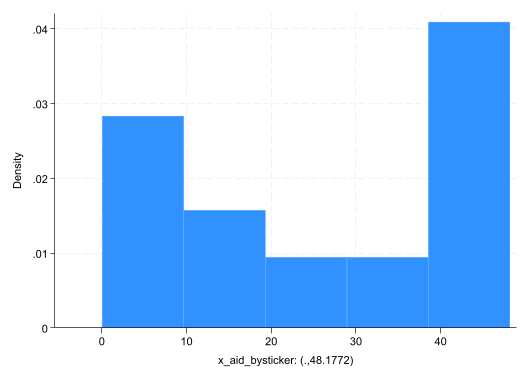

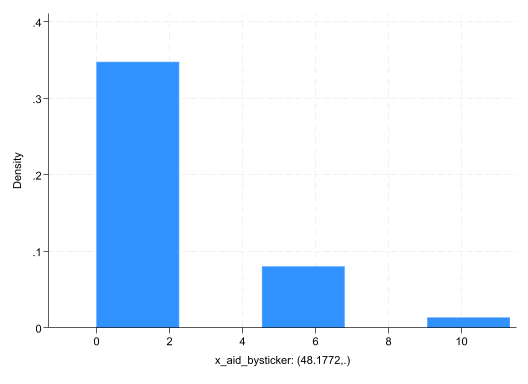

In [17]:
mkspline aidbysticker1 48.1772 aidbysticker2 = x_aid_bysticker

histogram aidbysticker1, name(hist3)
histogram aidbysticker2, name(hist4)

QUESTION: Why am I getting this error of [graph hist1 already exists] r(110)? I ran this with different variables and
keep getting it.


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(2, 30)        =      2.71
       Model |   258288440         2   129144220   Prob > F        =    0.0831
    Residual |  1.4320e+09        30  47734427.3   R-squared       =    0.1528
-------------+----------------------------------   Adj R-squared   =    0.0963
       Total |  1.6903e+09        32  52822539.3   Root MSE        =      6909

------------------------------------------------------------------------------
igrnt_low_~c | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
aidbystick~1 |  -201.9935   87.79642    -2.30   0.029    -381.2977   -22.68924
aidbystick~2 |    641.941   536.2869     1.20   0.241    -453.3029    1737.185
       _cons |   19393.37   2230.584     8.69   0.000      14837.9    23948.83
--------------------------------------------------

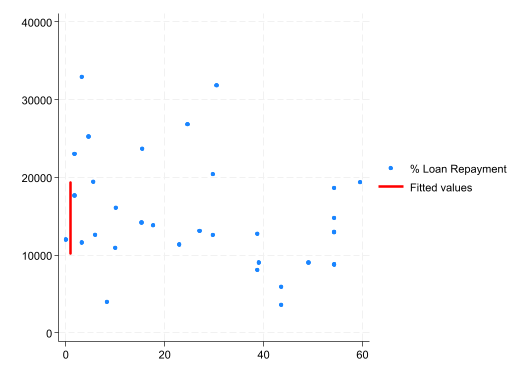

In [18]:
eststo: reg igrnt_low_inc aidbysticker1 aidbysticker2
predict yhat

*Graph the fited spline lines for college net price
tw (scatter igrnt_low_inc x_aid_bysticker) (line yhat hgroup, sort color(red) lwidth(thick))

In [19]:
esttab


--------------------------------------------
                      (1)             (2)   
             igrnt_low_~c    igrnt_low_~c   
--------------------------------------------
x_aid_byst~r       -112.6                   
                  (-1.82)                   

aidbystick~1                       -202.0*  
                                  (-2.30)   

aidbystick~2                        641.9   
                                   (1.20)   

_cons             18184.3***      19393.4***
                   (8.68)          (8.69)   
--------------------------------------------
N                      33              33   
--------------------------------------------
t statistics in parentheses
* p<0.05, ** p<0.01, *** p<0.001


QUESTION: Is this an acceptable graph to use? Yes or No? Why or why not? I suspect not b/c it is not a [spline].
So I take it that I will need to run a different kind of graph that you show in your example?

# MAKING A PIECEWISE CUBIC SPLINE

In [20]:
mkspline aidbysticker3 = x_aid_bysticker, cubic displayknots



             |     knot1      knot2      knot3      knot4      knot5 
-------------+-------------------------------------------------------
x_aid_byst~r |    3.2277    8.91087    27.0714    43.5452    54.2455 


In [21]:
eststo: regress y_lo_inc_rpy aidbysticker3*



      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(4, 28)        =      4.75
       Model |  891.636663         4  222.909166   Prob > F        =    0.0047
    Residual |  1312.84862        28  46.8874507   R-squared       =    0.4045
-------------+----------------------------------   Adj R-squared   =    0.3194
       Total |  2204.48528        32  68.8901651   Root MSE        =    6.8474

------------------------------------------------------------------------------
y_lo_inc_rpy | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
aidbystic~31 |  -.2560553    .606245    -0.42   0.676    -1.497892    .9857812
aidbystic~32 |    8.10836   8.262949     0.98   0.335    -8.817525    25.03424
aidbystic~33 |  -12.76126   12.52356    -1.02   0.317    -38.41462    12.89209
aidbystic~34 |   9.492999    8.07683     1.18   0.

NOTE: eststo = saves the results in the database

In [22]:
predict yhat2

(option xb assumed; fitted values)


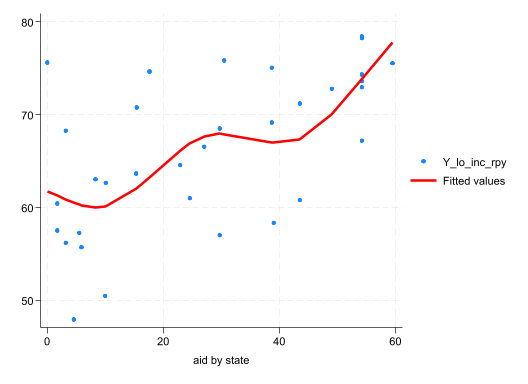

In [23]:
tw (scatter y_lo_inc_rpy x_aid_bysticker) (line yhat2 x_aid_bysticker, sort color(red) lwidth(thick))


In [24]:
esttab


------------------------------------------------------------
                      (1)             (2)             (3)   
             igrnt_low_~c    igrnt_low_~c    y_lo_inc_rpy   
------------------------------------------------------------
x_aid_byst~r       -112.6                                   
                  (-1.82)                                   

aidbystic~r1                       -202.0*                  
                                  (-2.30)                   

aidbystic~r2                        641.9                   
                                   (1.20)                   

aidbystic~31                                       -0.256   
                                                  (-0.42)   

aidbystic~32                                        8.108   
                                                   (0.98)   

aidbystic~33                                       -12.76   
                                                  (-1.02)   

aidbystic~34     

In [25]:
log close

      name:  <unnamed>
       log:  C:\Users\rabid\Desktop\01_Grad_Stats_II\soc211_assignments\week7\w
> 7lesson_log20200304.log
  log type:  text
 closed on:   5 Mar 2024, 22:48:17
-------------------------------------------------------------------------------


## 3. Interpret the results [1 pt]

    A. Say whether the results support or contradict your hypothesis and why
    
    B. Say whether a linear or particular non-linear model best describes your data and why

A. My results support my hypothesis, that the percent of loan repaid is positively impacted by the amount of aid a
provides.

B. The piecewise cubic spline best represents my data, where as the linear model and linear spline do not represent the relationship between the variables. This is because the linear spline overfits for the data. However, the cubic linear spline provides a gradual enough series of knots
to allow for a cleaner reading of the relationship between the the percent of loan repaid and the amount of aid provided by states.